# Get MSFT data from DB and convert to panda

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from db import getTickerPrices
import plotly.graph_objects as go

In [2]:
prices = getTickerPrices('MSFT')

In [28]:
msft = pd.DataFrame(data=prices, columns=['price_date', 'open', 'high', 'low', 'close', 'volume'])
msft = msft.astype({'price_date': 'datetime64', 'open': float, 'high': float, 'low': float, 'close': float})
#msft['price_date'] = pd.to_datetime(msft['price_date'])
msft = msft.set_index('price_date')
msft = msft.iloc[::-1]
msft.head()

,open,high,low,close,volume
price_date,,,,,
1999-11-01,93.25,94.19,92.12,92.37,26630600
1999-11-02,92.75,94.50,91.94,92.56,23174500
1999-11-03,92.94,93.50,91.50,92.00,22258500
1999-11-04,92.31,92.75,90.31,91.75,27119700
1999-11-05,91.81,92.87,90.50,91.56,35083700


# Plot data on line graph by year

In [14]:
def plotYear(data, year):
    yearStart = str(year) + '-01-01'
    yearEnd = str(int(year) + 1) + '-01-01'
    data = data[['close']].loc[yearStart:yearEnd]
    data['MA 20'] = data.rolling(window=20, center=False).mean()
    data.plot()
    plt.title(str(year))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend();

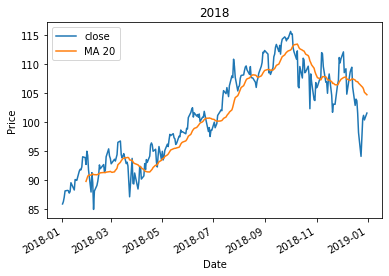

In [29]:
plotYear(msft, 2018)

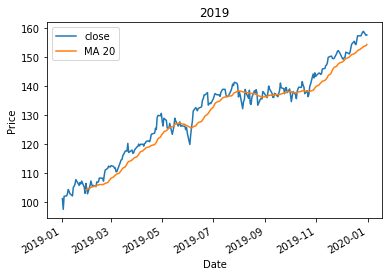

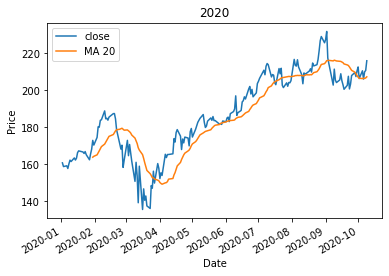

In [30]:
for year in range(2019, 2021):
    plotYear(msft, year)

# Plot candle graph with plotly

In [40]:
def candleGraph(data, startDate, endDate):
    df = data.loc[startDate: endDate]
    fig = go.Figure(
        data=[go.Candlestick(x=df.index,
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close']
        )])
    config = dict({
        'scrollZoom': True,
        'displaylogo': False,
        'modeBarButtonsToAdd': ['drawline', 'drawopenpath', 'drawclosedpath', 'drawcircle', 'drawrect', 'eraseshape']
    })
    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show(config=config)

In [41]:
candleGraph(msft, '2020-07-01', '2021-01-01')